<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°09



<a id='p1'></a>
## I.- Problema 01


<img src="https://drive.google.com/uc?export=view&id=1w5HIG2LsuVnhhuEYfRvpBn4hHziWj_wW" width = "300" align="center"/>

El **cáncer de mama**  es una proliferación maligna de las células epiteliales que revisten los conductos o lobulillos mamarios. Es una enfermedad clonal; donde una célula individual producto de una serie de mutaciones somáticas o de línea germinal adquiere la capacidad de dividirse sin control ni orden, haciendo que se reproduzca hasta formar un tumor. El tumor resultante, que comienza como anomalía leve, pasa a ser grave, invade tejidos vecinos y, finalmente, se propaga a otras partes del cuerpo.

El conjunto de datos se denomina `BC.csv`, el cual contine la información de distintos pacientes con tumosres (benignos o malignos) y algunas características del mismo.


Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen.
Los detalles se puede encontrar en [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].


Lo primero será cargar el conjunto de datos:

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.pipeline import make_pipeline

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import RandomizedSearchCV

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [17]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_09/data/BC.csv", sep=",")
df = df.set_index('id')
df['diagnosis'] = df['diagnosis'].replace({'M':1,'B':0}) # target
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Basado en la información presentada responda las siguientes preguntas:

#### 1. Realice un análisis exploratorio del conjunto de datos.

In [51]:
# Cantidad de datos NaN
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

La dataframe de todos los diagnósticos no cuenta con datos desconocidos. Esto es, no es necesario limpiar NaN por ahora. Veamos como se compone:

In [52]:
# df original
display(df.head())

# Estadísticas
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Analizando cada target por separado:

In [53]:
# Diagnóstico tumor beningno
display(df.head())

# Estadísticas
df[df["diagnosis"]==0].describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,357.0,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,...,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,0.0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
std,0.0,1.780512,3.995125,11.807438,134.287118,0.013446,0.033750,0.043442,0.015909,0.024807,...,1.981368,5.493955,13.527091,163.601424,0.020013,0.092180,0.140368,0.035797,0.041745,0.013804
min,0.0,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210
25%,0.0,11.080000,15.150000,70.870000,378.200000,0.083060,0.055620,0.020310,0.015020,0.158000,...,12.080000,19.580000,78.270000,447.100000,0.110400,0.112000,0.077080,0.051040,0.240600,0.070090
50%,0.0,12.200000,17.390000,78.180000,458.400000,0.090760,0.075290,0.037090,0.023440,0.171400,...,13.350000,22.820000,86.920000,547.400000,0.125400,0.169800,0.141200,0.074310,0.268700,0.077120
75%,0.0,13.370000,19.760000,86.100000,551.100000,0.100700,0.097550,0.059990,0.032510,0.189000,...,14.800000,26.510000,96.590000,670.000000,0.137600,0.230200,0.221600,0.097490,0.298300,0.085410
max,0.0,17.850000,33.810000,114.600000,992.100000,0.163400,0.223900,0.410800,0.085340,0.274300,...,19.820000,41.780000,127.100000,1210.000000,0.200600,0.584900,1.252000,0.175000,0.422800,0.148600


In [54]:
# Diagnóstico tumor maligno
display(df.head())

# Estadísticas
df[df["diagnosis"]==1].describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,212.0,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,1.0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
std,0.0,3.203971,3.779470,21.854653,367.937978,0.012608,0.053987,0.075019,0.034374,0.027638,...,4.283569,5.434804,29.457055,597.967743,0.021870,0.170372,0.181507,0.046308,0.074685,0.021553
min,1.0,10.950000,10.380000,71.900000,361.600000,0.073710,0.046050,0.023980,0.020310,0.130800,...,12.840000,16.670000,85.100000,508.100000,0.088220,0.051310,0.023980,0.028990,0.156500,0.055040
25%,1.0,15.075000,19.327500,98.745000,705.300000,0.094010,0.109600,0.109525,0.064620,0.174050,...,17.730000,25.782500,119.325000,970.300000,0.130475,0.244475,0.326425,0.152750,0.276500,0.076302
50%,1.0,17.325000,21.460000,114.200000,932.000000,0.102200,0.132350,0.151350,0.086280,0.189900,...,20.590000,28.945000,138.000000,1303.000000,0.143450,0.356350,0.404900,0.182000,0.310300,0.087600
75%,1.0,19.590000,23.765000,129.925000,1203.750000,0.110925,0.172400,0.203050,0.103175,0.209850,...,23.807500,32.690000,159.800000,1712.750000,0.155975,0.447850,0.556175,0.210675,0.359225,0.102625
max,1.0,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500


Veamos la cantidad de datos sobre diagnósticos de cancer malignos y beningnos:


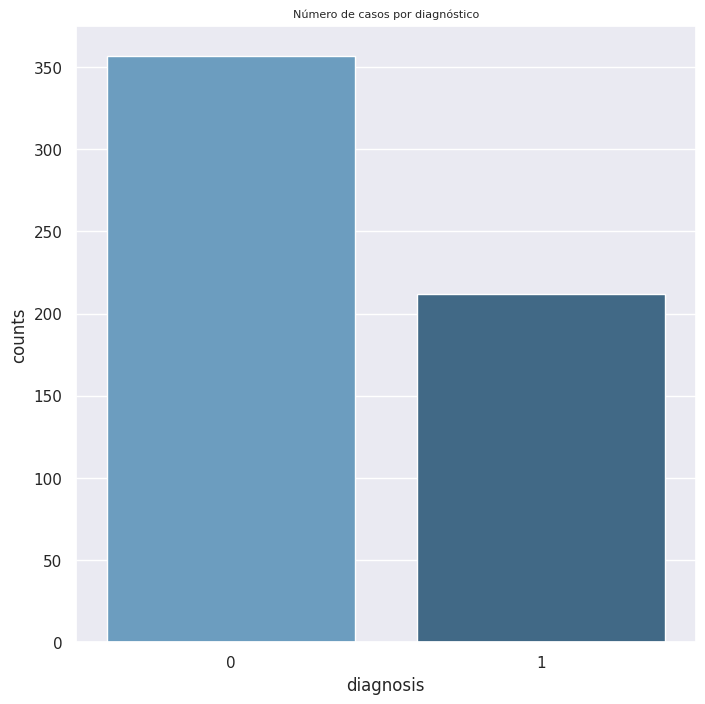

In [55]:
dg = df.groupby(["diagnosis"]).size().reset_index(name="counts")
fig, ax = plt.subplots(figsize=(8,8),nrows=1)
sns.barplot(data=dg, y='counts', x='diagnosis', palette="Blues_d", ax=ax)
ax.set_title('Número de casos por diagnóstico',size=8)
plt.show()

Notemos que la data esta levemente desbalanceada. La cantidad de tumores benignos es mayor a la de malignos.

In [56]:
df.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

Todas las variables son del tipo numérica.

####2. Normalizar las variables numéricas con el método **StandardScaler**.

Dado a que todas las columnas son numéricas, basta seleccionar aquellas que servirán como predictores.

In [57]:
# Creamos una copia
df_scaled = df.copy()

# filtramos atributos
col_names = df_scaled.columns.drop(['diagnosis'])
features = df_scaled[col_names]

# Estandarizamos
scaler = StandardScaler()
scaler_fit = scaler.fit(features.values) # ajusta modelo a los datos
features = scaler_fit.transform(features.values) # escala los datos
df_scaled[col_names] = features

scaled_features = df_scaled.copy()

df_scaled.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
842517,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
84300903,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
84348301,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
84358402,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


Veamos si podemos hacer una reducción de dimensionalidad.

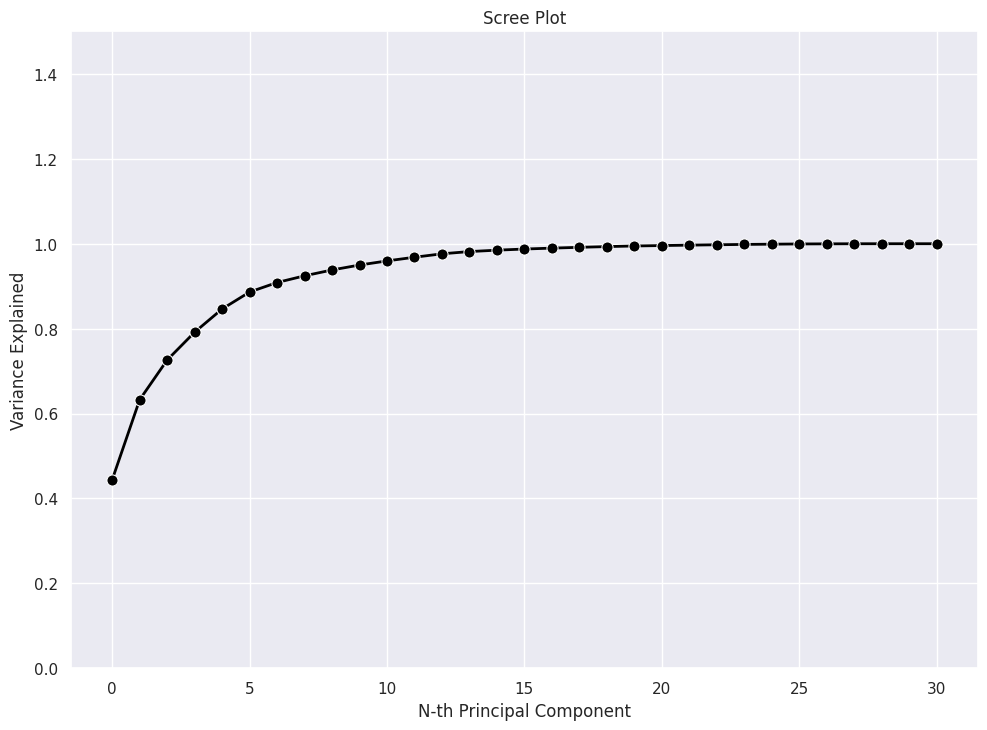

In [58]:
# Apliación de PCA
pca = PCA()
_ = pca.fit_transform(df_scaled)
PC_components = np.arange(pca.n_components_)+1
recta = sns.lineplot(x=PC_components-1, y=np.cumsum(pca.explained_variance_ratio_), color='black', linestyle='-', linewidth=2, marker='o', markersize=8)
plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1.5)
plt.show()

Dado a que desde el dato 10 el comportamiento de la curva se estabiliza, pro la regla del codo solo consideraremos los primeros 10 datos. De esta forma la dataframe quedará como:

In [59]:
# Filtrado de variables
df_scaled = df_scaled.drop(['diagnosis','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst','compactness_worst',
       'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],axis=1)
df_scaled.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,
842302,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747
842517,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652
84300903,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008
84348301,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919
84358402,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450


#### 3. Realizar un método de reducción de dimensionalidad visto en clases.

Dado a que ya utilizamos el PCA para la reducción de dimensionalidad, y ha funcionado con éxito, se aplicará al modelo original.

In [60]:
# Normalización StandardScaler() y reducción de dimensionalidad PCA()
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df_scaled)

# Entrenamiento modelo PCA
modelo_pca = pca_pipe.named_steps['pca']

pd.DataFrame(
    data    = modelo_pca.components_,
    columns = df_scaled.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4',
              'PC5','PC6','PC7','PC8','PC9','PC10'
              ]
)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
PC1,0.363938,0.154451,0.376044,0.364086,0.232481,0.364442,0.395748,0.418038,0.215238,0.071837
PC2,-0.313929,-0.147181,-0.284658,-0.304842,0.401962,0.266013,0.104286,0.007184,0.368301,0.571768
PC3,-0.124428,0.951057,-0.114084,-0.123378,-0.166532,0.058278,0.041146,-0.068554,0.036724,0.113584
PC4,0.029559,0.008916,0.013458,0.013443,-0.107802,-0.185700,-0.166654,-0.072984,0.892998,-0.349332
PC5,-0.031067,-0.219923,-0.005945,-0.019341,-0.843745,0.240183,0.312533,-0.009180,0.112888,0.264878
PC6,-0.264180,-0.032207,-0.237819,-0.331707,0.062225,0.005271,0.601467,0.265613,-0.061957,-0.567919
PC7,-0.044188,0.020557,-0.083369,0.261188,0.011292,-0.803805,0.367136,0.141313,0.047902,0.345214
PC8,0.084834,-0.007127,0.089259,0.144610,0.170503,0.063980,0.449573,-0.850919,0.016456,-0.065259
PC9,-0.474425,-0.004213,-0.380167,0.747347,-0.005847,0.218732,-0.081171,0.022025,-0.009068,-0.129667
PC10,-0.669071,0.000250,0.740491,-0.032359,0.003690,-0.052753,-0.010367,-0.003748,0.001467,0.007057


Analicemos gráficamente los resultados del PCA:

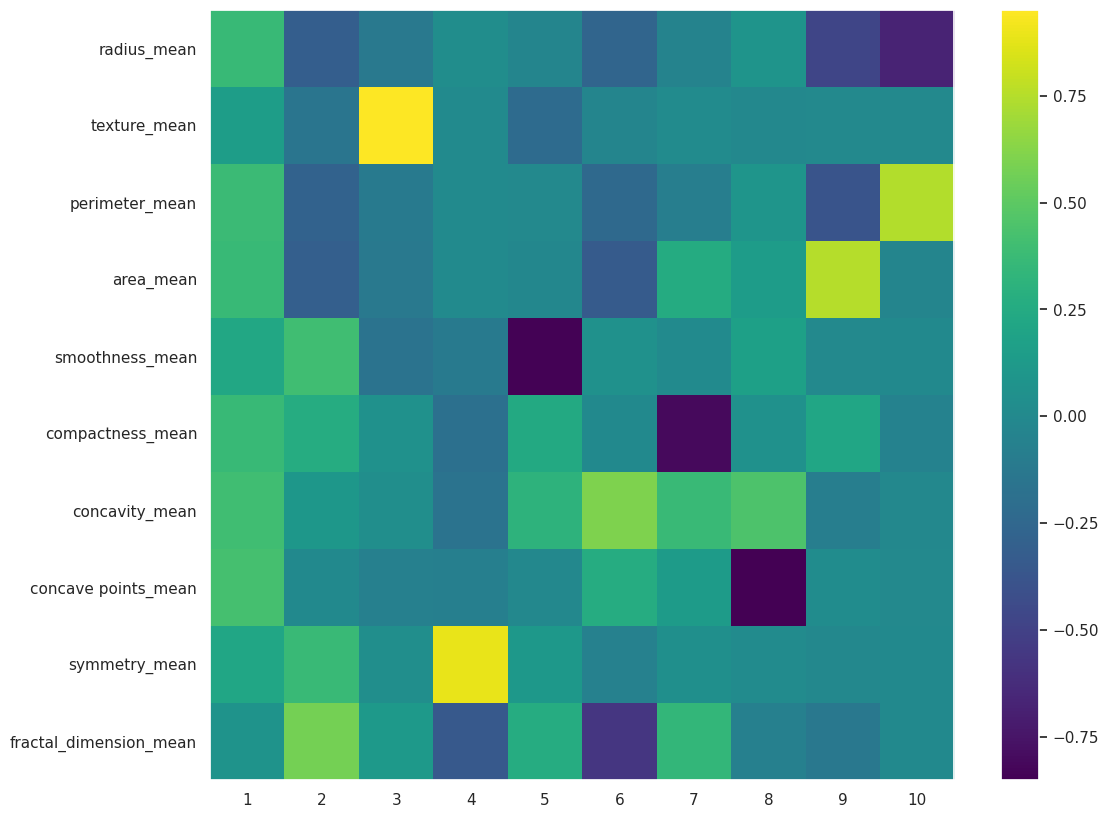

In [61]:
# Heatmap
plt.figure(figsize=(12,10))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(df_scaled.columns)), df_scaled.columns)
plt.xticks(range(len(df_scaled.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

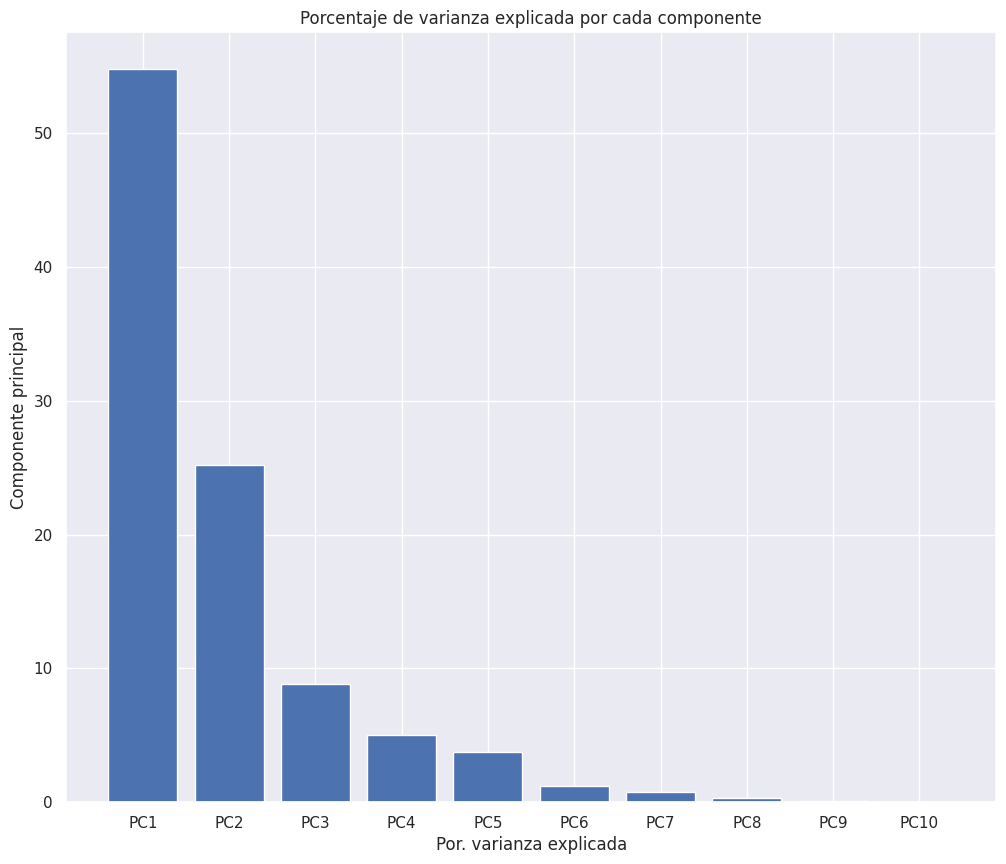

In [62]:
# Graficar varianza por componente
percent_variance = np.round(modelo_pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4',
           'PC5','PC6','PC7','PC8','PC9','PC10'
          ]
plt.figure(figsize=(12,10))
plt.bar(x= range(1,11), height=percent_variance, tick_label=columns)
plt.xticks(np.arange(modelo_pca.n_components_) + 1)

plt.ylabel('Componente principal')
plt.xlabel('Por. varianza explicada')
plt.title('Porcentaje de varianza explicada por cada componente')
plt.show()

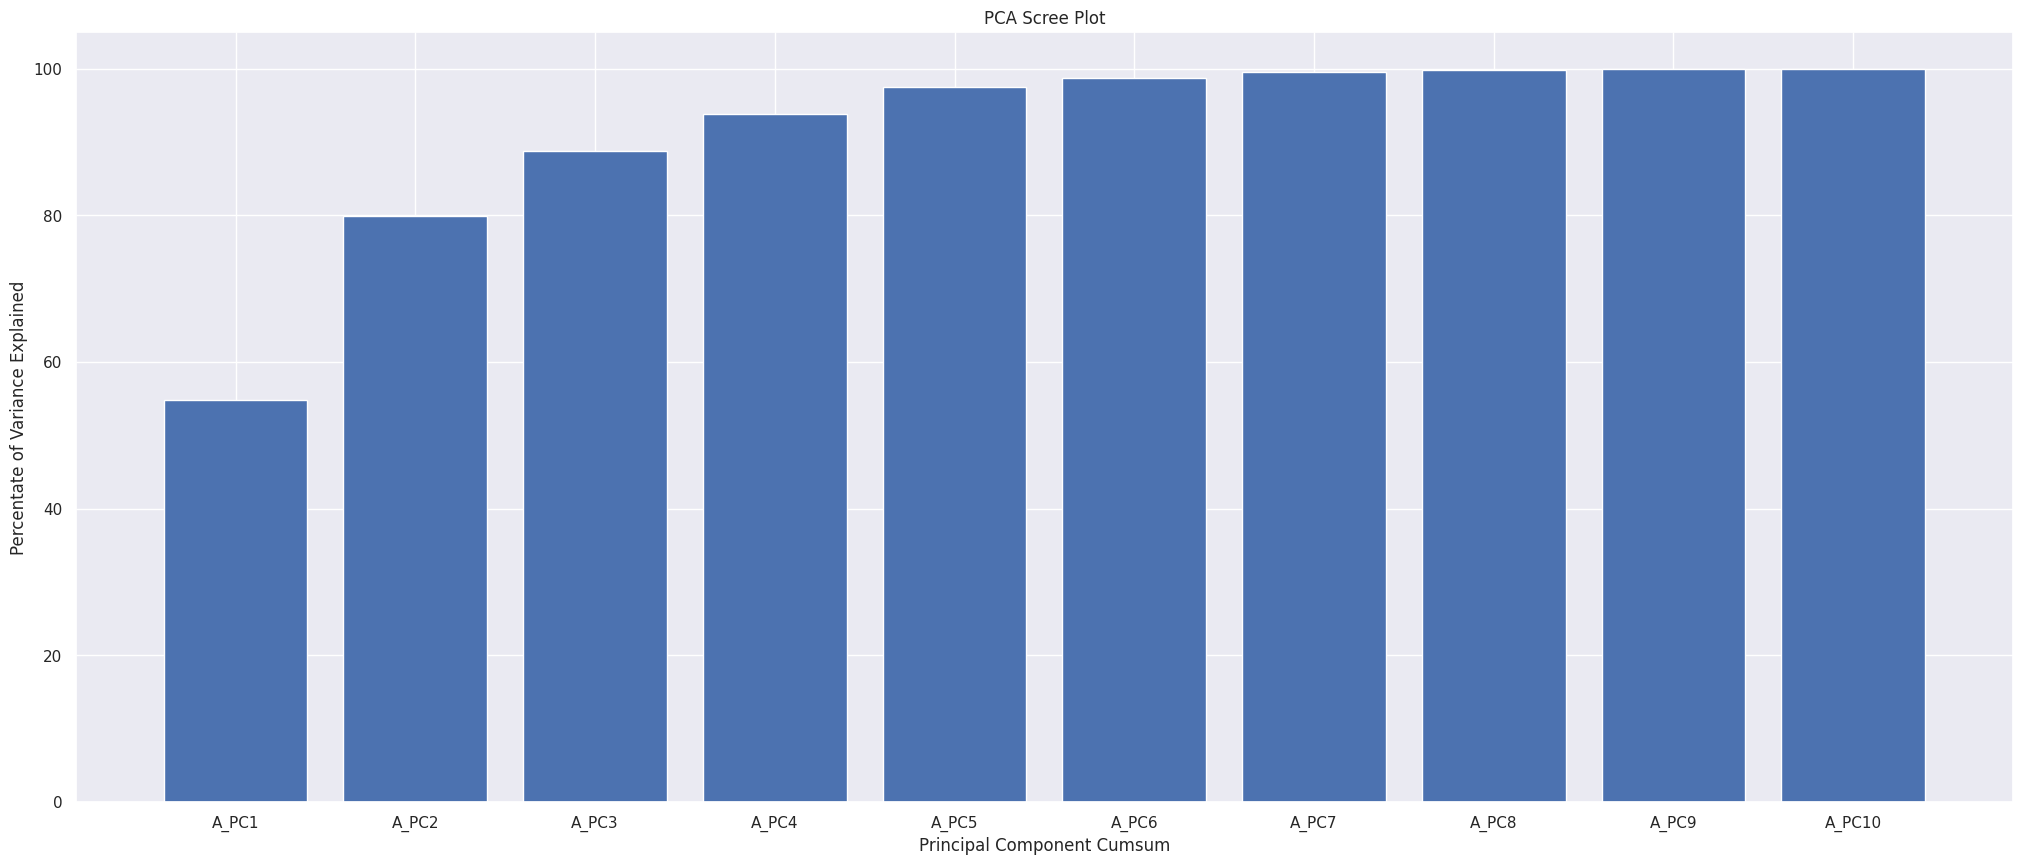

In [63]:
# Graficar varianza por la suma acumulada de los componentes
percent_variance_cum = np.cumsum(percent_variance)
columns = ['A_PC1','A_PC2','A_PC3','A_PC4','A_PC5','A_PC6',
           'A_PC7','A_PC8','A_PC9','A_PC10']
plt.figure(figsize=(25,10))
plt.bar(x= range(1,11), height=percent_variance_cum, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

Por último aplicamos transform para poder cambiar la dimensión de las variables involucradas en la data.

In [64]:
proyecciones = pca_pipe.transform(X=df_scaled)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4',
              'PC5', 'PC6', 'PC7', 'PC8',
              'PC9', 'PC10'],
    index   = df_scaled.index
)
proyecciones.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
id,,,,,,,,,,
842302,5.224155,3.204428,-2.171340,-0.169276,1.514252,0.113123,-0.344684,-0.231932,-0.021982,-0.011258
842517,1.728094,-2.540839,-1.019679,0.547539,0.312330,-0.935634,0.420922,-0.008343,-0.056171,-0.022992
84300903,3.969757,-0.550075,-0.323569,0.397964,-0.322877,0.271493,0.076506,-0.355050,0.020116,-0.022675
84348301,3.596713,6.905070,0.792832,-0.604828,0.243176,-0.616970,-0.068051,-0.100163,-0.043481,-0.053456
84358402,3.151092,-1.358072,-1.862234,-0.185251,0.311342,0.090778,0.308087,0.099057,-0.026574,0.034113


####4. Aplique al menos tres modelos de clasificación distintos. Para cada uno de los modelos escogidos, realice una optimización de los hiperparámetros. además, calcule las respectivas métricas. Concluya.

In [71]:
df_scaled_new=scaled_features.drop([
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst','compactness_worst',
       'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],axis=1)

# Datos
y = df_scaled_new.diagnosis
X = df_scaled_new.drop('diagnosis', axis=1)

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

Entrenemos tres modelos: Regresión Logística, Random Forest y Arbol de Decisión.

In [72]:
# Regresión Logística
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

lr_pred = lr.predict(X_test)
y_true =  list(y_test)
y_pred = list(lr.predict(X_test)) # predecir

accuracy1 = accuracy_score(y_test, lr_pred)
recall1 = recall_score(y_test, lr_pred)
precision1 = precision_score(y_test, lr_pred)
fscore1 = f1_score(y_test, lr_pred)

# Random Forest
rfc =  RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

y_true =  list(y_test)
y_pred = list(rfc.predict(X_test)) # predecir

accuracy2 = accuracy_score(y_true, y_pred)
recall2 = recall_score(y_true, y_pred)
precision2 = precision_score(y_true, y_pred)
fscore2 = f1_score(y_true, y_pred)

# Arbol de decisión
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

y_true =  list(y_test)
y_pred = list(dtree.predict(X_test)) # predecir

accuracy3 = accuracy_score(y_true, y_pred)
recall3 = recall_score(y_true, y_pred)
precision3 = precision_score(y_true, y_pred)
fscore3 = f1_score(y_true, y_pred)

Veamos las métricas:

In [73]:
Datos = {'n_modelo': ['logistic_regression','random_forest','decision_tree'],
          'accuracy': [accuracy1,accuracy2,accuracy3],
          'recall': [recall1,recall2,recall3],
          'precision': [precision1,precision2,precision3],
          'f-score': [fscore1,fscore2,fscore3],
}
AnalisisDeDatos=pd.DataFrame(Datos)
AnalisisDeDatos

,n_modelo,accuracy,recall,precision,f-score
0,logistic_regression,0.916084,0.824561,0.959184,0.886792
1,random_forest,0.937063,0.894737,0.944444,0.918919
2,decision_tree,0.937063,0.877193,0.961538,0.917431


Por último optimizamos hiperparámetros:

In [75]:
# Regresión Logística
c_space = np.logspace(0.234,1)
param_grid = {'C': c_space} # Creación hiperparámetro C

logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)

logreg_cv.fit(X, y) # Entrenamiento vía CV

print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 10.0}
Best score is 0.9349635149821458


In [77]:
# Random Forest
# Número de árboles
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 300, num = 10)]

max_features = ['auto', 'sqrt'] # n° atributos a considerar en split

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)] # Max profundidad
max_depth.append(None)

min_samples_split = [2, 5, 10] # N° mínimo de muestras para split

min_samples_leaf = [1, 2, 4] # N° mínimo de muestras para cada nodo hoja

bootstrap = [True, False] # Método de selección de muestras para entrenar cada árbol

# random_grid para encontrar los mejores hiperparámetros
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rfc_random.fit(X_train, y_train)

rfc_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


{'n_estimators': 188,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': False}

In [78]:
for max_d in range(1,21):
  model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
  model.fit(X_train, y_train)
  print('The Training Accuracy for max_depth {} is:'.format(max_d), model.score(X_train, y_train))
  print('The Validation Accuracy for max_depth {} is:'.format(max_d), model.score(X_train, y_train))
  print('')

The Training Accuracy for max_depth 1 is: 0.9154929577464789
The Validation Accuracy for max_depth 1 is: 0.9154929577464789

The Training Accuracy for max_depth 2 is: 0.9225352112676056
The Validation Accuracy for max_depth 2 is: 0.9225352112676056

The Training Accuracy for max_depth 3 is: 0.9530516431924883
The Validation Accuracy for max_depth 3 is: 0.9530516431924883

The Training Accuracy for max_depth 4 is: 0.9741784037558685
The Validation Accuracy for max_depth 4 is: 0.9741784037558685

The Training Accuracy for max_depth 5 is: 0.9882629107981221
The Validation Accuracy for max_depth 5 is: 0.9882629107981221

The Training Accuracy for max_depth 6 is: 0.9953051643192489
The Validation Accuracy for max_depth 6 is: 0.9953051643192489

The Training Accuracy for max_depth 7 is: 1.0
The Validation Accuracy for max_depth 7 is: 1.0

The Training Accuracy for max_depth 8 is: 1.0
The Validation Accuracy for max_depth 8 is: 1.0

The Training Accuracy for max_depth 9 is: 1.0
The Validation

Conclsión: Se ve un buen funcionamiento de los modelos dada la aplicación del modelo PCA hecha anteriormente.